In [4]:
from marketlib import data
candle = data.Candle("2023.10.30 07:00",2001.46,2002.57,1999.48,1999.61)

In [5]:
print(candle.body_size())
print(candle.hour())
print(candle.is_bearish())
print(candle.is_doji())
print(candle.money_flow_multiplier())
print(candle.money_flow_volume())

1.8500000000001364
7
True
False
-0.9158576051780678


ValueError: Volume cannot be zero when calculating MFV

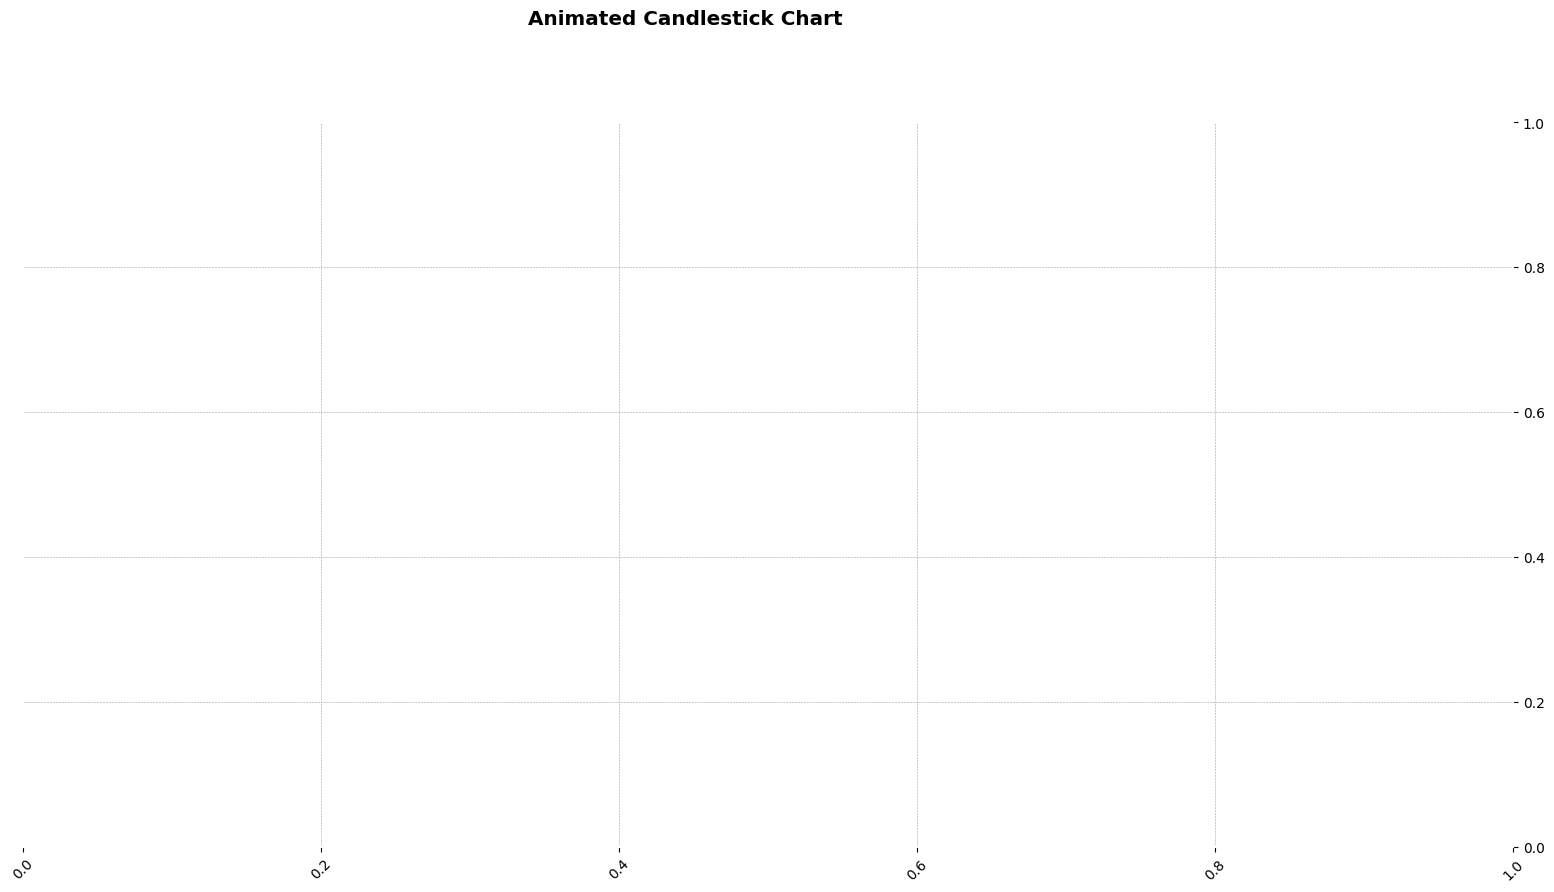

In [6]:

from marketlib import Market
import pandas as pd
from marketlib import Chart
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.animation as animation


df = pd.read_csv("E:/Work/Test/btc15m.csv", parse_dates=["Datetime"])


btcusdt = Market(df, "btcusdt", '15m')
chart = Chart()
chart.layer.set_layer(xlim=(0, 300))
chart.add_chart(df, symbol='btcusdt', timeframe='15m')
# chart.plot()


# df.set_index("Datetime", inplace=True)

custom_style = mpf.make_mpf_style(
    base_mpf_style='classic',
    marketcolors=mpf.make_marketcolors(
        up='black',          # Blue for upward candles
        down='r',        # Red for downward candles
        edge='inherit',  # Edge color follows up/down
        wick='inherit'
    )
)


# mpf.plot(
#     btcusdt.to_dataframe()[1:20],
#     **dict(
#         {
#             "type": "candle",
#             "style": custom_style,
#             "figsize": (10, 6),
#             "ylabel": "Price",
#             "panel_ratios": (3, 1),
#             'axisoff':False,
#             "tight_layout": False,
#             "linecolor": "blue",
#             'tight_layout': False,
#             "volume": True,
#             "update_width_config":dict(candle_width=0.6,candle_linewidth=1.5,volume_width=.8,volume_linewidth=1.0),
#             "xrotation": 15,
#             "show_nontrading": False,
#             "warn_too_much_data": 1000,
#         }
#     )
# )

df = btcusdt.to_dataframe()

# فرض بر این است که دیتافریم آماده است و ایندکس آن از نوع DatetimeIndex است

# تنظیمات اولیه
fig, axlist = mpf.plot(
    df[:10],  # شروع با ۳۰ کندل اول
    type='candle',
    style='charles',
    returnfig=True,
    figscale=1.8,
    figratio=(2,1),
    title='Animated Candlestick Chart',
)



ax = axlist[0]   # محور اصلی

all_artists = ax.get_children()
ax.clear()
active_artists = []

def animate(i):
    if i < len(all_artists):
        artist = all_artists[i]
        ax.add_artist(artist)
        active_artists.append(artist)
    return active_artists

ani = animation.FuncAnimation(fig, animate, frames=len(all_artists), interval=1000, blit=False)
plt.show()




In [ ]:
ax.get_children()[9]

TypeError: 'Rectangle' object is not subscriptable

In [ ]:
import matplotlib
import matplotlib.patches


TypeError: Rectangle.__init__() missing 3 required positional arguments: 'xy', 'width', and 'height'

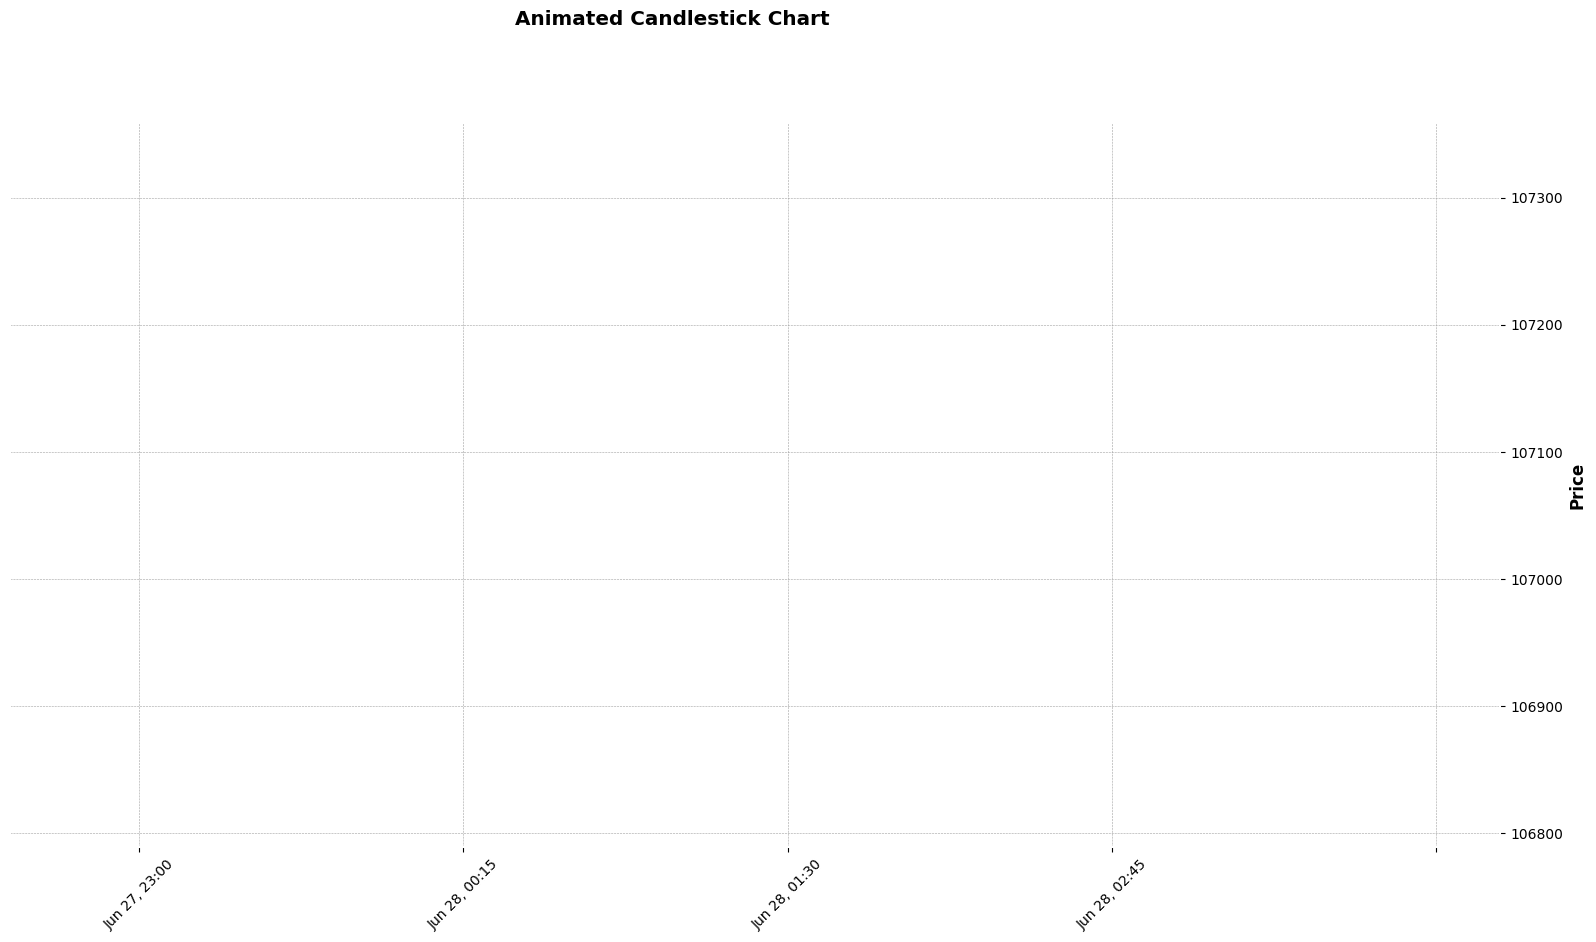

In [58]:
import matplotlib.collections
import time

plt.ion()

fig, axlist = mpf.plot(
    df[:20],  # شروع با ۳۰ کندل اول
    type="candle",
    style="charles",
    returnfig=True,
    figscale=1.8,
    figratio=(2, 1),
    title="Animated Candlestick Chart",
)
ax = axlist[0]

p = ax.get_children()[1].get_paths()

ax.get_children()[1].set_visible(False)
ax.get_children()[0].set_visible(False)

v = [ver.vertices for ver in p]
colors = ax.get_children()[1].get_facecolors()
# p = matplotlib.collections.PolyCollection(v[:3], facecolor=colors[:3])
# ax.add_collection(p)

# p = matplotlib.collections.PolyCollection(v[:5], facecolor=colors[:5])
# ax.add_collection(p)

# plt.plot(fig=fig, ax=axlist)

for i in range(10):
    poly = matplotlib.collections.PolyCollection(v[:i], facecolors=colors[:i])
    ax.add_collection(poly)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.show()
    time.sleep(0.5)


plt.ioff()



In [62]:
ax.collections[0].get_paths()


[Path(array([[     0.  , 107030.78],
        [     0.  , 107080.62]]), None),
 Path(array([[1.0000000e+00, 1.0697627e+05],
        [1.0000000e+00, 1.0699876e+05]]), None),
 Path(array([[2.0000000e+00, 1.0695198e+05],
        [2.0000000e+00, 1.0695733e+05]]), None),
 Path(array([[3.0000000e+00, 1.0695734e+05],
        [3.0000000e+00, 1.0695734e+05]]), None),
 Path(array([[4.0000000e+00, 1.0685200e+05],
        [4.0000000e+00, 1.0685202e+05]]), None),
 Path(array([[5.0000000e+00, 1.0685201e+05],
        [5.0000000e+00, 1.0685202e+05]]), None),
 Path(array([[6.0000000e+00, 1.0692717e+05],
        [6.0000000e+00, 1.0694235e+05]]), None),
 Path(array([[7.0000000e+00, 1.0704757e+05],
        [7.0000000e+00, 1.0704813e+05]]), None),
 Path(array([[8.0000000e+00, 1.0690921e+05],
        [8.0000000e+00, 1.0690921e+05]]), None),
 Path(array([[9.0000000e+00, 1.0681479e+05],
        [9.0000000e+00, 1.0682509e+05]]), None),
 Path(array([[1.0000000e+01, 1.0682509e+05],
        [1.0000000e+01, 1.06825